In [164]:
%matplotlib inline

import pandas as pd
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from matplotlib import font_manager, rc
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)
rc('font', family='AppleGothic')
import seaborn as sns


from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, Ridge, Lasso, LassoLarsCV

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

NameError: name 'matplotlib' is not defined

## 0. 데이터셋에 대한 간단한 EDA

In [165]:
bikes = pd.read_csv("3rd_week/dataset/train.csv")
print("바이크 데이터:\n{}:".format(bikes.head()))

바이크 데이터:
              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  :


In [166]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [167]:
bikes["datetime"].value_counts()

2011-09-10 21:00:00    1
2011-07-12 02:00:00    1
2012-04-04 01:00:00    1
2011-03-14 21:00:00    1
2011-11-12 17:00:00    1
2012-05-07 01:00:00    1
2012-11-01 22:00:00    1
2011-08-14 02:00:00    1
2012-02-03 09:00:00    1
2011-06-08 07:00:00    1
2012-03-18 14:00:00    1
2011-06-04 10:00:00    1
2011-06-19 21:00:00    1
2011-04-07 13:00:00    1
2012-01-09 17:00:00    1
2012-05-15 11:00:00    1
2012-02-02 17:00:00    1
2011-05-02 12:00:00    1
2012-07-14 16:00:00    1
2011-06-17 10:00:00    1
2011-07-10 15:00:00    1
2012-03-14 13:00:00    1
2011-10-18 18:00:00    1
2011-02-09 23:00:00    1
2011-01-08 17:00:00    1
2012-12-11 03:00:00    1
2011-03-17 00:00:00    1
2011-01-06 17:00:00    1
2012-06-04 08:00:00    1
2012-09-03 07:00:00    1
                      ..
2011-01-10 17:00:00    1
2012-05-17 16:00:00    1
2012-05-09 23:00:00    1
2011-07-10 09:00:00    1
2012-10-09 01:00:00    1
2011-10-13 09:00:00    1
2011-01-11 15:00:00    1
2011-12-12 07:00:00    1
2011-07-13 23:00:00    1


In [168]:
bikes["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [169]:
bikes["windspeed"].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
50.0021       1
51.9987       1
Name: windspeed, dtype: int64

In [170]:
bikes["registered"].value_counts()

3      195
4      190
5      177
6      155
2      150
1      135
7      126
8      114
9      114
11      87
10      72
14      67
19      66
23      61
22      59
12      57
16      56
15      54
20      53
13      52
21      52
18      51
24      51
30      49
95      48
26      47
17      46
28      46
48      45
43      44
      ... 
790      1
806      1
886      1
420      1
492      1
556      1
439      1
807      1
645      1
718      1
803      1
726      1
742      1
750      1
833      1
761      1
713      1
689      1
673      1
641      1
513      1
633      1
811      1
609      1
593      1
577      1
561      1
537      1
521      1
839      1
Name: registered, Length: 731, dtype: int64

In [171]:
bikes['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

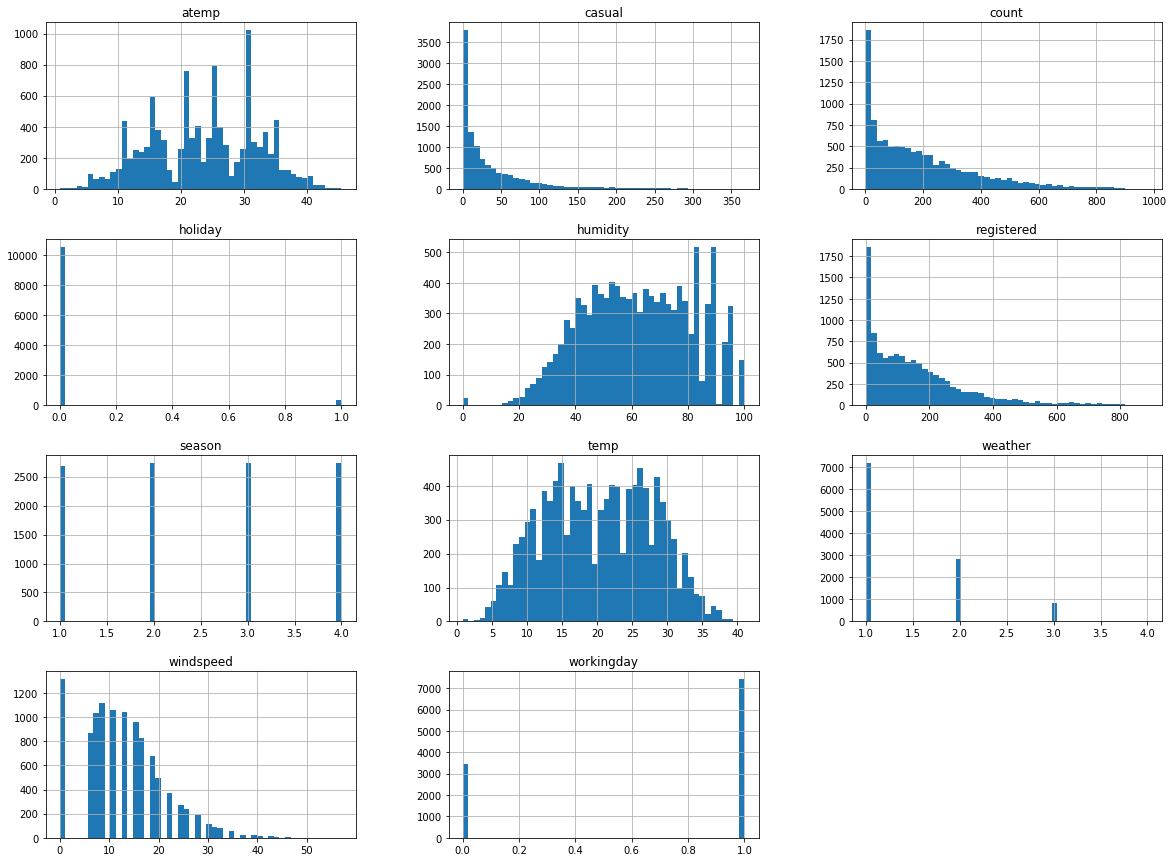

In [172]:
bikes.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [173]:
# bikes.datetime.min()
bikes.datetime.max()

'2012-12-19 23:00:00'

In [174]:
corr_matrix = bikes.corr()

In [175]:
corr_matrix["count"].sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
temp          0.394454
atemp         0.389784
season        0.163439
windspeed     0.101369
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64

### registered, casual 은 두 값을 합했을때 count가 되므로 상관계수가 높을수밖에 없다<br>
### 객관적 특성이라고 할수있는 temp, humidity가 고려되어야 하지않을까<br>
### season별 count의 평균값을 더해주면 좋을것같다

NameError: name 'save_fig' is not defined

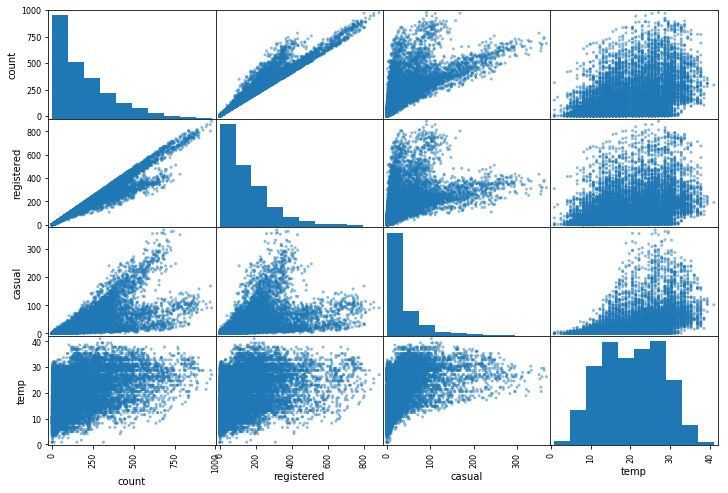

In [176]:
from pandas.plotting import scatter_matrix

attributes = ["count", "registered", "casual", "temp"]
scatter_matrix(bikes[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

In [177]:
index = pd.date_range(start="2011-1-1", periods=719, freq="D")
ts = pd.Series(np.random.randn(719), index=index)


## 1. 분류 문제로 풀어보기 (수요 낮음, 중간, 높음 - 나누는 기준은 자신만의 논리로 정하기)<br>
season, weather 별 count 평균을 구해서 평균기준으로 낮음/ 중간/ 높음 구분

In [178]:
season_count = bikes["count"].groupby(bikes["season"])
season_count_mean = season_count.mean()
# season_count.std()
season_count_mean

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

In [179]:
weather_count = bikes["count"].groupby(bikes["weather"])
weather_count.mean()
weather_count.std()


weather
1    187.959566
2    168.366413
3    138.581297
4           NaN
Name: count, dtype: float64

In [180]:
season_weather_count = bikes["count"].groupby([bikes["season"], bikes["weather"]])
season_weather_count.mean()

season  weather
1       1          126.781694
        2          106.861538
        3           61.227488
        4          164.000000
2       1          236.729595
        2          189.515537
        3          123.906250
3       1          243.583420
        2          230.771523
        3          156.582915
4       1          209.511163
        2          194.784387
        3          134.466667
Name: count, dtype: float64

In [181]:
# plt.figure(figsize=(10, 3))
# xticks = pd.date_range(start=bikes.datetime.min(), end=bikes.datetime.max(), freq='D')
# week = ["일", "월", "화", "수", "목", "금", "토"]
# xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"), xticks.strftime(" %m-%d"))]
# plt.xticks(xticks, xticks_name, rotation=90, ha="left")
# plt.plot(bikes, linewidth=1)
# plt.xlabel("날짜")
# plt.ylabel("대여횟수")

In [182]:
y = bikes['count']
X = bikes.index.astype("int64").values.reshape(-1, 1) // 10 ** 9


In [183]:
# bikes['grade'] = bikes['count'].apply(lambda x: 2 if x > season_count_mean else (1 if x == season_count_mean else 0))

In [184]:
n_train = 7620

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10,3))

    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha="left")

    plt.plot(range(n_train), y_train, label="훈련")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="테스트")
    plt.plot(range(n_train), y_pred_train, '--', label="훈련 예측")

    plt.plot(range(n_train, len(y_test)+ n_train), y_pred, '--', label="테스트 예측")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("날짜")
    plt.ylabel("대여횟수")

테스트 세트 R^2: -0.24


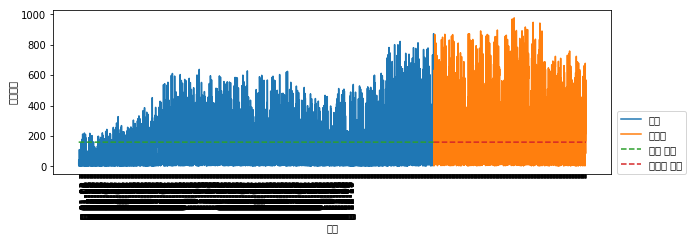

In [185]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

테스트 세트 R^2: 0.32


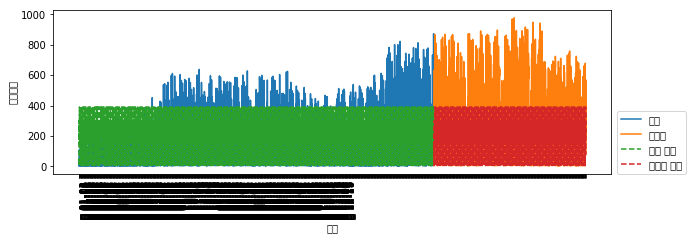

In [186]:
bikes["datetime"] = pd.to_datetime(bikes["datetime"])

X_hour = bikes["datetime"].dt.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

테스트 세트 R^2: 0.47


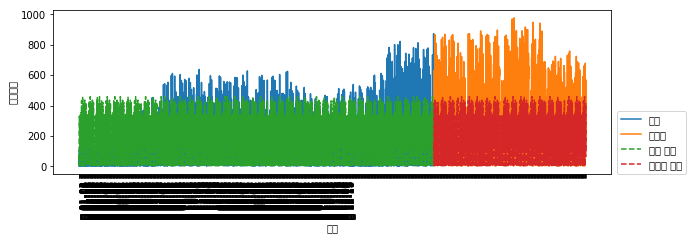

In [187]:
X_hour_week = np.hstack([bikes["datetime"].dt.dayofweek.values.reshape(-1, 1), bikes["datetime"].dt.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

테스트 세트 R^2: -0.07


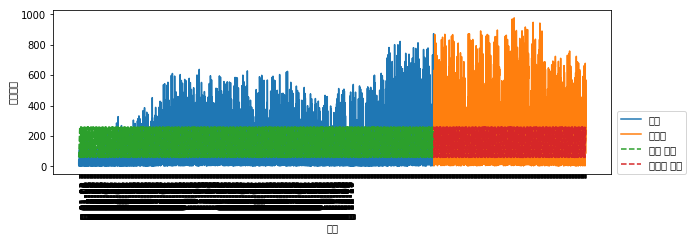

In [188]:
eval_on_features(X_hour_week, y, LinearRegression())

테스트 세트 R^2: 0.32


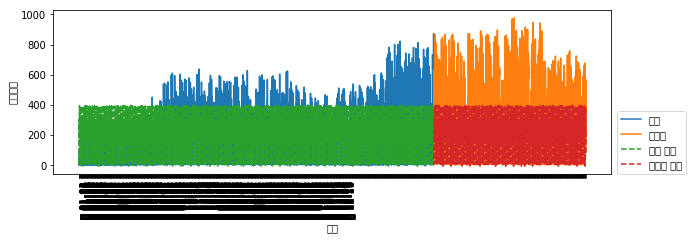

In [189]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

eval_on_features(X_hour_week_onehot, y, Ridge())

테스트 세트 R^2: 0.47


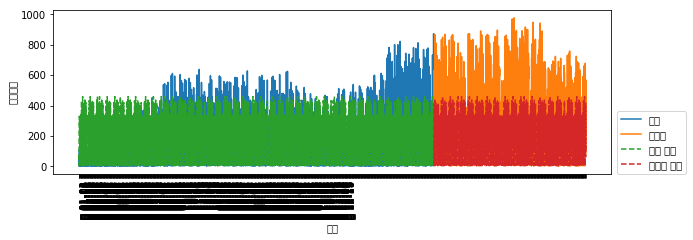

In [190]:
from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [191]:
hour = ["%02d:00" % i for i in range(0, 24, 1)]
day = ["월", "화", "수", "목", "금", "토", "일"]
features = day + hour

In [192]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0,0.5,'계수 크기')

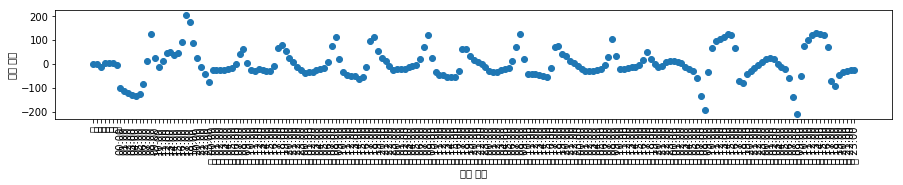

In [193]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("특성 이름")
plt.ylabel("계수 크기")

1-1. 모델 피팅은 train (70%) / test (30%)로 나누고, 5-cv를 돌릴 것



In [194]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
for train_index, test_index in split.split(bikes, bikes["season"]):
    train_set = bikes.loc[train_index]
    test_set = bikes.loc[test_index]

## 위의 문제를 다시 regression 문제로 풀어보기 (카운트 데이터라는 것 감안할 것

In [195]:
y = train_set['count'].values
X = train_set.drop(columns=['count', 'datetime', 'season', 'windspeed', 'workingday', 'holiday', 'holiday'])


def error(actual, predicted):
    actual = np.log(actual)
    predicted = np.log(predicted)
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))


In [196]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

Ypred_lin_reg = lin_reg.predict(X)
error(y, Ypred_lin_reg)

4.5300281110249894e-14

In [197]:
# eval_on_features(X, y, RandomForestRegressor())